In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Importing necessary libraries
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return ' '.join([word for word in a.split() if word.lower() not 
            in stopwords.words('english')])

In [ ]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['text'] = df['text'].apply(text_process)

In [ ]:
df.head()

,id,text,author
0,id26305,process however afford mean ascertain dimensio...,EAP
1,id17569,never occur fumble might mere mistake,HPL
2,id11008,leave hand gold snuff box caper hill cut manne...,EAP
3,id27763,lovely spring look Windsor Terrace sixteen fer...,MWS
4,id12958,Finding nothing else even gold Superintendent ...,HPL


In [ ]:

from sklearn.preprocessing import LabelEncoder
y = df['author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


process however afford mean ascertain dimension dungeon might make circuit return point whence set without aware fact perfectly uniform seem wall
EAP


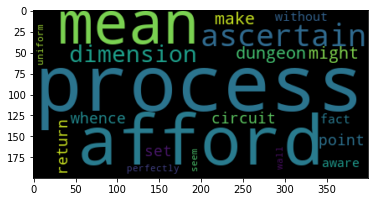

never occur fumble might mere mistake
HPL


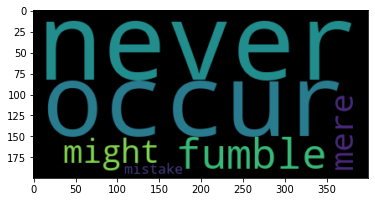

lovely spring look Windsor Terrace sixteen fertile counties spread beneath speckle happy cottages wealthier towns look former years heart cheer fair
MWS


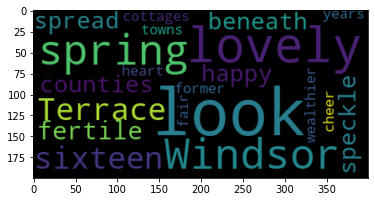

In [ ]:
# Importing necessary libraries
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X = df['text']
wordcloud1 = WordCloud().generate(X[0]) # for EAP
wordcloud2 = WordCloud().generate(X[1]) # for HPL
wordcloud3 = WordCloud().generate(X[3]) # for MWS 
print(X[0])
print(df['author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(X[1])
print(df['author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print(X[3])
print(df['author'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

In [ ]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# 80-20 splitting the dataset (80%->Training and 20%->Validation)
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state=1234)
# defining the bag-of-words transformer on the text-processed corpus # i.e., text_process() declared in II is executed...
bow_transformer=TfidfVectorizer().fit(X_train)
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test=bow_transformer.transform(X_test)#TEST DATA

In [ ]:
# Importing necessary libraries
from sklearn.naive_bayes import MultinomialNB
# instantiating the model with Multinomial Naive Bayes..
model = MultinomialNB()
# training the model...
model = model.fit(text_bow_train, y_train)

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.sav', 'wb'))
pickle.dump(labelencoder, open('labelencoder.sav', 'wb'))
pickle.dump(bow_transformer, open('bow_transformer.sav', 'wb'))

In [ ]:
model = pickle.load(open("model.sav", 'rb'))
bow_transformer = pickle.load(open("bow_transformer.sav", 'rb'))
model.predict(bow_transformer.transform(X))

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(model)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(text_bow_test))

array([[1397,   55,  110],
       [ 244,  824,   81],
       [ 157,   27, 1021]])

In [ ]:
labelencoder.classes_

array(['EAP', 'HPL', 'MWS'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,  model.predict(text_bow_test),target_names=labelencoder.classes_))

              precision    recall  f1-score   support

         EAP       0.78      0.89      0.83      1562
         HPL       0.91      0.72      0.80      1149
         MWS       0.84      0.85      0.84      1205

    accuracy                           0.83      3916
   macro avg       0.84      0.82      0.83      3916
weighted avg       0.84      0.83      0.83      3916



In [ ]:
df['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [ ]:
from sklearn.svm import SVC

svc = SVC()

In [ ]:
%%time
svc.fit(text_bow_train, y_train)

CPU times: user 1min 39s, sys: 165 ms, total: 1min 40s
Wall time: 1min 40s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(classification_report(y_test,  svc.predict(text_bow_test),target_names=labelencoder.classes_))

              precision    recall  f1-score   support

         EAP       0.77      0.88      0.82      1562
         HPL       0.86      0.76      0.81      1149
         MWS       0.85      0.79      0.82      1205

    accuracy                           0.82      3916
   macro avg       0.83      0.81      0.82      3916
weighted avg       0.82      0.82      0.82      3916

